In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
Temperatures=pd.read_csv("Measure_data.csv")
Electric_energy=pd.read_csv("Pressure_data_40min.csv")

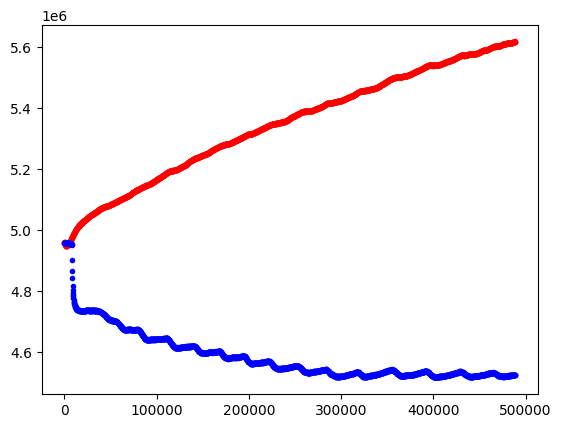

In [83]:
#calculating the whole energy
energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]*60
all_energy=energy.sum()
#CHANNEL0 for the hot reservoir
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL0"]+273.15)*4*4182, marker=".", color="red")
plt.scatter(np.linspace(0, all_energy, 2400), (Temperatures["CHANNEL4"]+273.15)*4*4182, marker=".", color="blue")
plt.show()

[ 2.31941000e+01  3.80257775e+05 -2.13414376e+05  3.80132315e+05
 -2.13725517e+05  3.72236699e+05 -2.36092526e+05  3.65431749e+05
 -2.60784727e+05  3.63931247e+05 -2.63158430e+05  3.33288897e+05
 -2.60798109e+05  3.35087157e+05 -2.68083153e+05  3.13489636e+05
 -2.66221327e+05  3.16348451e+05 -2.85880072e+05  3.14784383e+05
 -2.84239055e+05  3.08395960e+05 -2.97333734e+05  3.11207937e+05
 -2.95348120e+05  2.88819182e+05 -2.93872711e+05  2.94592015e+05
 -3.14294253e+05  2.90558894e+05 -3.10088834e+05  2.95500345e+05
 -3.30399971e+05  2.95707772e+05 -3.26030618e+05  2.96228013e+05
 -3.45731183e+05  2.98143369e+05 -3.40386588e+05  3.05853304e+05]


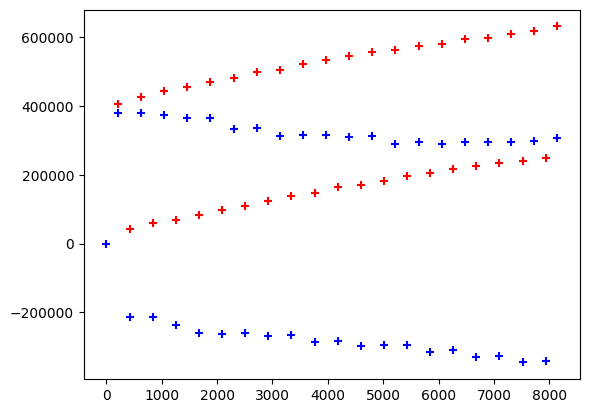

In [101]:
temps_hot=[23.2235,]
for i in range(1, 40, 1):
    temps_hot.append(Temperatures["CHANNEL0"][40*i]*4*4182-temps_hot[i-1])
temps_hot=np.array(temps_hot)

temps_cold=[23.1941,]
for i in range(1, 40, 1):
    temps_cold.append(Temperatures["CHANNEL4"][40*i]*4*4182-temps_cold[i-1])
temps_cold=np.array(temps_cold)

energy=Electric_energy["I(A)"]*Electric_energy["U(V)"]
all_energy=energy.sum()
plt.scatter(np.linspace(0, all_energy, 40), temps_hot, marker="+", color="red")
plt.scatter(np.linspace(0, all_energy, 40), temps_cold, marker="+", color="blue")

x=np.linspace(0, all_energy, 39)
def myfunction(x):
  return (1 * x + 23.2088 + 273.15)*4*4182 #transformation in Joule

mymodel = list(map(myfunction, x))
#plt.plot(x, mymodel)
print(temps_cold)